### Libraries

In [1]:
# Import necessar libraries only
import numpy as np
import matplotlib.pyplot as plt

# for ML
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

# dataset
from sklearn.datasets import load_wine

### Import the data from SKlearn datasets

In [2]:
# Import dataset
wine = load_wine()
X = wine.data[:, :5]  
y = wine.target

### Setup the functions

In [3]:
def plot_regions_func(axes, 
                train_data, 
                models, 
                num_models
                ):

    x_min, x_max = axes[0], axes[1]
    y_min, y_max = axes[2], axes[3]
    
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    
    plt.figure(figsize=(15, 10))
    
    for i, (model, (X_train, y_train)) in enumerate(zip(models, train_data)):

        Z = model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros(300*300), np.zeros(300*300), np.zeros(300*300)])
        Z = Z.reshape(xx.shape)
        
        plt.subplot(2, 3, i + 1)
        
        plt.contourf(xx, yy, Z, 
                     alpha=0.3, 
                     cmap=plt.cm.RdYlBu
                     )
        
        plt.scatter(X_train[:, 0], X_train[:, 1], 
                    c=y_train, 
                    edgecolor='k', 
                    s=15, 
                    cmap=plt.cm.RdYlBu
                    )
        
        plt.title(f"Tree {i+1}")
        plt.xlim(x_min, x_max)
        plt.ylim(y_min, y_max)
        plt.xlabel('Alcohol')
        plt.ylabel('Malic Acid')
    
    
    plt.tight_layout()
    plt.show()




def plot_tree_func(models, 
                     num_models
                     ):
    
    fig, axes = plt.subplots(nrows=num_models, 
                             figsize=(10, 20)
                             )
    
    for i, model in enumerate(models):
        
        plot_tree(model, 
                  filled=True, 
                  feature_names=['Alcohol', 
                                 'Malic Acid', 
                                 'Ash',
                                 'Alcalinity of ash',
                                 'Magnesium'], 
                  ax=axes[i]
                  )
        
        axes[i].set_title(f"Tree {i+1}")

    plt.tight_layout()
    plt.show()


### Specify params

In [ ]:
# change these params to vizualise how decision trees behave (you can also add/change some other)
MAX_DEPTH = 4
MIN_SAMPLES_LEAF = 5
RANDOM_STATE = None
TEST_SIZE = 0.2

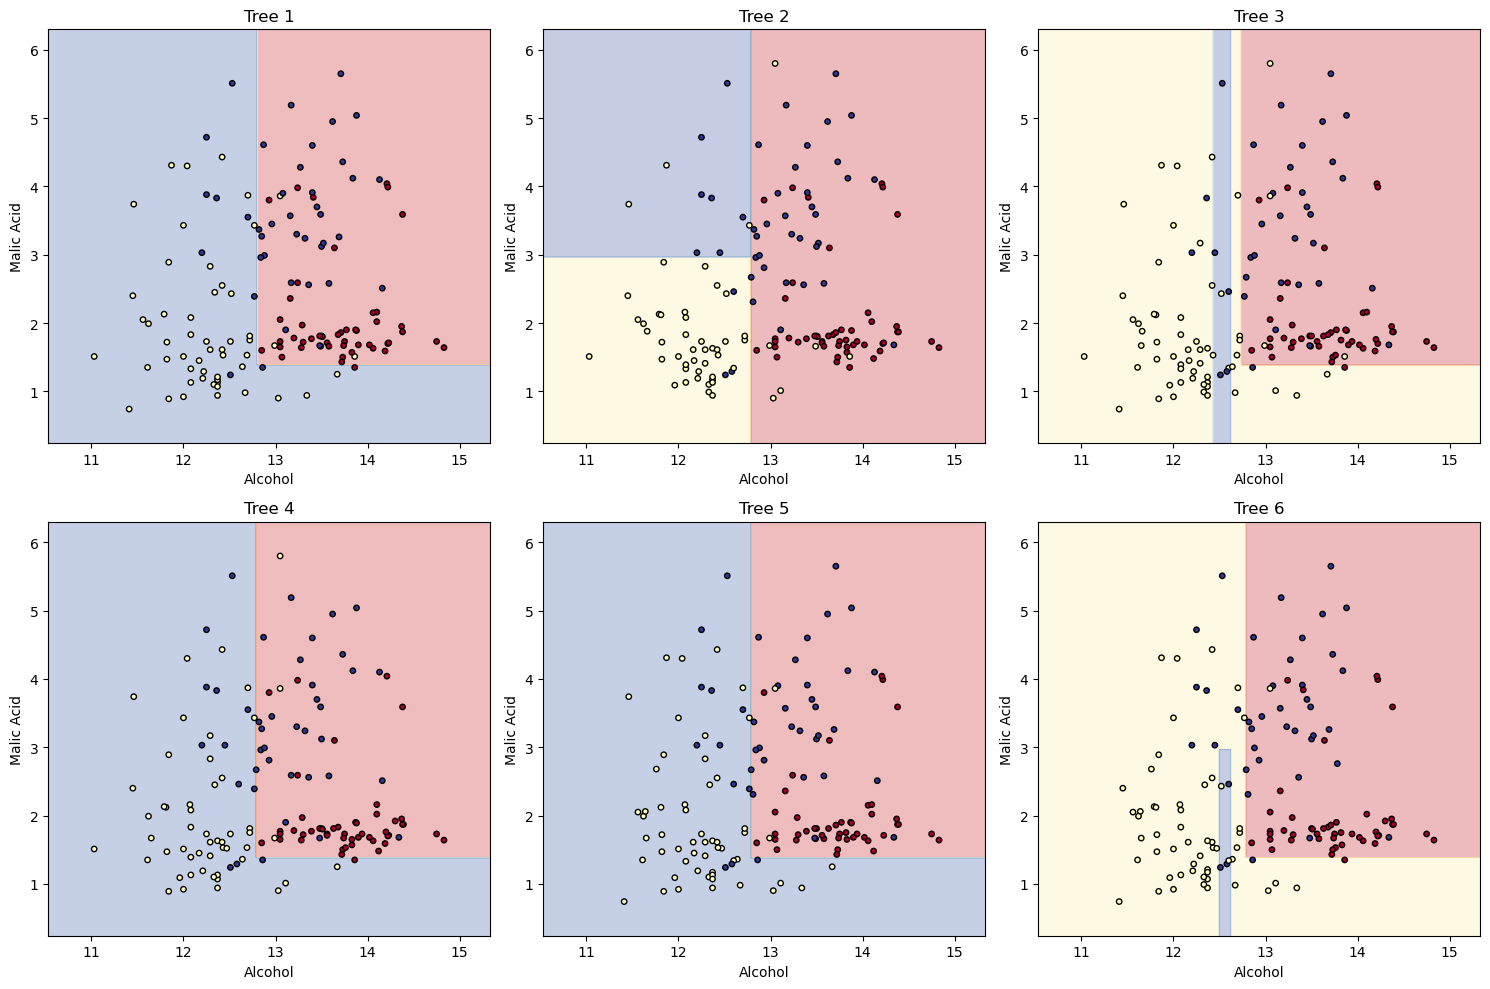

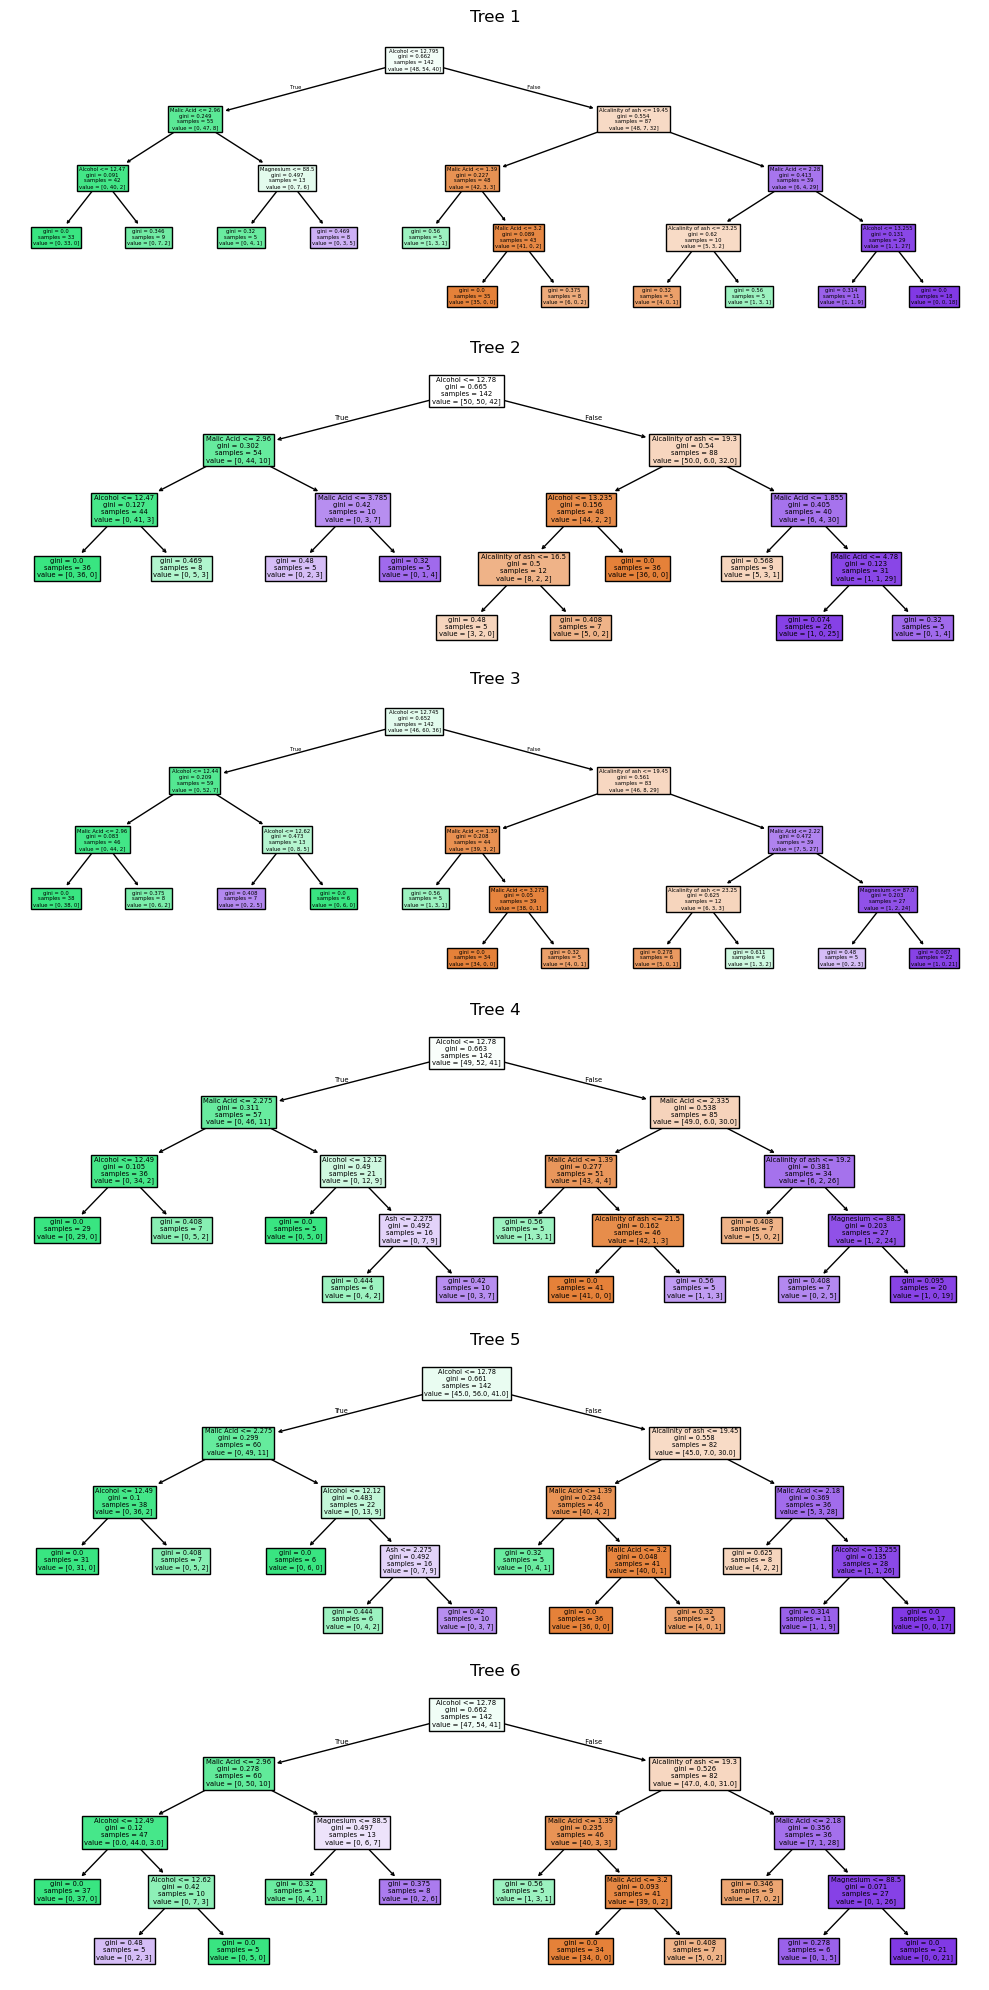

In [ ]:
# Fit and vizualize 6 trees

trees = []
train_data = []  


n_trees = 6
for _ in range(n_trees):
    X_train, _, y_train, _ = train_test_split(X, y, 
                                              test_size=TEST_SIZE,
                                              random_state=RANDOM_STATE
                                              )
    
    tree = DecisionTreeClassifier(max_depth=MAX_DEPTH, 
                                  min_samples_leaf=MIN_SAMPLES_LEAF)

    tree.fit(X_train,
             y_train
             )
    
    trees.append(tree)
    train_data.append((X_train[:, :2], 
                       y_train)) 


plot_regions_func(
    (X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, X[:, 1].min() - 0.5, X[:, 1].max() + 0.5),
    train_data,
    trees, 
    n_trees
)

plot_tree_func(trees, 
               n_trees)